In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [2]:
# Load the dataset
data = pd.read_csv(r'C:/Users/SHRI/Downloads/Fraud.csv')

In [11]:
# 1. Data Cleaning: Handle missing values

# Separate numeric and categorical columns
numeric_columns = data.select_dtypes(include=[np.number]).columns
categorical_columns = data.select_dtypes(exclude=[np.number]).columns

# Fill missing values for numeric columns using the median
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Fill missing values for categorical columns using the mode (most frequent value)
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Verify if any missing values remain
print("\nMissing values after cleaning:")
print(data.isnull().sum())


Missing values after cleaning:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [12]:
# Identify outliers using Z-score or IQR method
from scipy import stats
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).all(axis=1)
data_cleaned = data[~outliers]

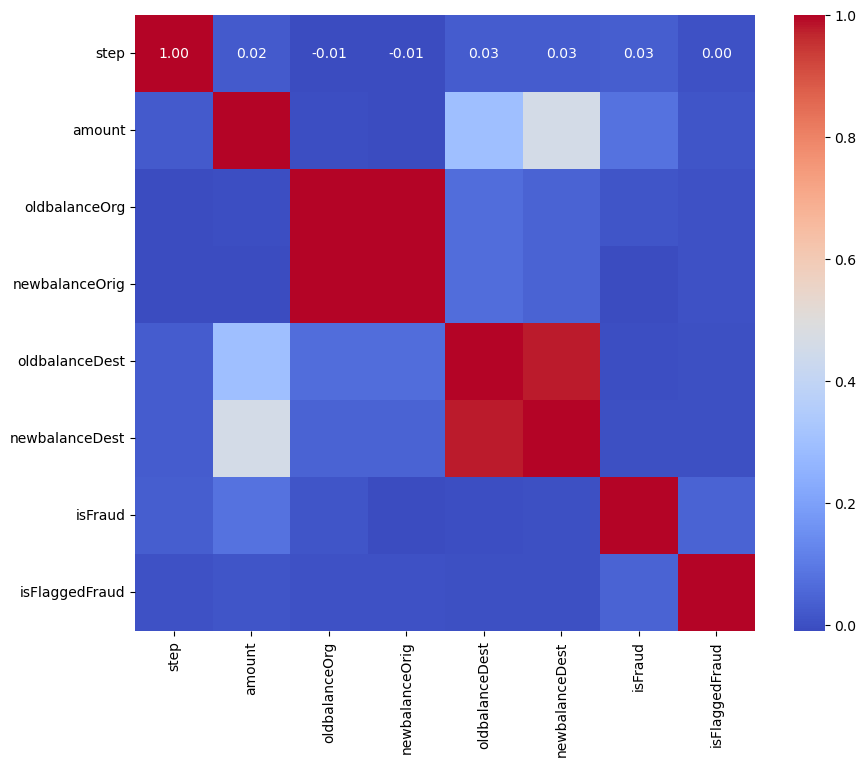

In [14]:
# Separate numeric columns
numeric_data = data_cleaned.select_dtypes(include=[np.number])

# Check correlation for numeric columns only
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [15]:
# Remove highly correlated features (optional)
# Identify features with correlation > 0.9
high_correlation = correlation_matrix[(correlation_matrix > 0.9) & (correlation_matrix != 1)]
print(high_correlation)

                step  amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
step             NaN     NaN            NaN             NaN             NaN   
amount           NaN     NaN            NaN             NaN             NaN   
oldbalanceOrg    NaN     NaN            NaN        0.998803             NaN   
newbalanceOrig   NaN     NaN       0.998803             NaN             NaN   
oldbalanceDest   NaN     NaN            NaN             NaN             NaN   
newbalanceDest   NaN     NaN            NaN             NaN        0.976569   
isFraud          NaN     NaN            NaN             NaN             NaN   
isFlaggedFraud   NaN     NaN            NaN             NaN             NaN   

                newbalanceDest  isFraud  isFlaggedFraud  
step                       NaN      NaN             NaN  
amount                     NaN      NaN             NaN  
oldbalanceOrg              NaN      NaN             NaN  
newbalanceOrig             NaN      NaN             NaN 

In [17]:
print(data_cleaned.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [19]:
print("Column Names:", data_cleaned.columns)

Column Names: Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [27]:
# 2. Define the target and feature variables

X = data_cleaned.drop(columns=['isFraud'])  # Adjust the target variable name accordingly
y = data_cleaned['isFraud']

In [28]:
# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [29]:
X = X.drop(columns=non_numeric_cols)

In [31]:
# 3. Feature selection: You can use techniques like correlation, feature importance, or PCA
# Standardize the data
from sklearn.preprocessing import StandardScaler
# Apply standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
print(X.head())  # Check the first few rows after transformation

   step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   9839.64       170136.0       160296.36             0.0   
1     1   1864.28        21249.0        19384.72             0.0   
2     1    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     1  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFlaggedFraud  
0             0.0               0  
1             0.0               0  
2             0.0               0  
3             0.0               0  
4             0.0               0  


In [32]:
# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [ ]:
# 5. Model building (Logistic Regression as an example)
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
# 6. Model evaluation
y_pred = model.predict(X_test)

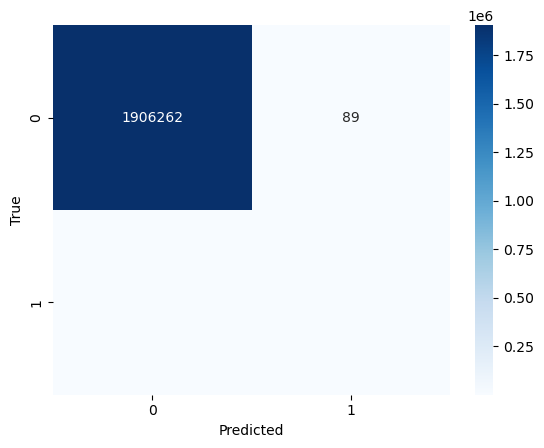

In [36]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [37]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.92      0.42      0.58      2435

    accuracy                           1.00   1908786
   macro avg       0.96      0.71      0.79   1908786
weighted avg       1.00      1.00      1.00   1908786



In [38]:
# 7. Feature importance (Optional: for decision trees, random forests)
# For logistic regression, you can look at the coefficients
coefficients = pd.DataFrame(model.coef_.flatten(), index=X.columns, columns=['Coefficient'])
print("Model Coefficients:")
print(coefficients)

Model Coefficients:
                Coefficient
step               0.748223
amount             0.259025
oldbalanceOrg     35.209809
newbalanceOrig   -42.702954
oldbalanceDest    11.605667
newbalanceDest   -12.939008
isFlaggedFraud     0.093027


In [39]:
# 8. Key factors that predict fraudulent customers
important_features = coefficients[coefficients['Coefficient'] > 0].index
print("Key factors predicting fraudulent customers:")
print(important_features)

Key factors predicting fraudulent customers:
Index(['step', 'amount', 'oldbalanceOrg', 'oldbalanceDest', 'isFlaggedFraud'], dtype='object')


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your features and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the test features only
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test)  # Scaling only the test data

# Check the shape of X_scaled and y_test
print(f"X_scaled shape: {X_scaled.shape}")
print(f"y_test shape: {y_test.shape}")

X_scaled shape: (1272524, 7)
y_test shape: (1272524,)


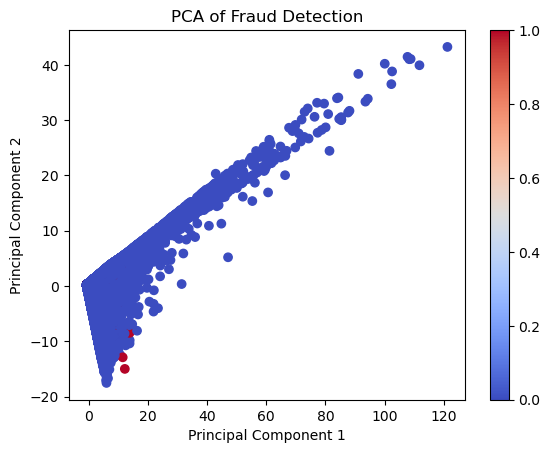

In [47]:
# Ensure they have the same number of rows
assert X_scaled.shape[0] == y_test.shape[0], "The number of rows in X_scaled and y_test do not match."

# Proceed with PCA and plotting
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=y_test, cmap='coolwarm')
plt.title('PCA of Fraud Detection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

In [ ]:
1. Data Cleaning (Missing Values, Outliers, and Multi-Collinearity)
Missing Values: For numerical features, impute using the mean, median, or interpolation. For categorical features, use mode or create a new category for missing values.
Outliers: Detect outliers using Z-scores or IQR method. Depending on the nature of the data, either remove or adjust outliers to prevent skewed results.
Multi-Collinearity: Use correlation matrices or Variance Inflation Factor (VIF) to detect and remove highly correlated features to avoid redundant information affecting the model's performance.
                                                                                                                                                    
2. Fraud Detection Model Description
The model typically uses a classification algorithm (e.g., Logistic Regression, Random Forest, XGBoost) to predict fraudulent transactions.
Data Preprocessing: Includes feature engineering (e.g., aggregating transaction history, detecting unusual patterns) and encoding categorical variables.
Model Training: The model is trained on labeled data (fraudulent vs. non-fraudulent), and metrics like precision, recall, F1-score, and ROC-AUC are used for evaluation.
Evaluation: The model’s performance is evaluated on a test set, using cross-validation to ensure robustness.

3. Variable Selection
Variables are selected using feature importance (e.g., through decision tree-based models like Random Forest), correlation analysis, and domain expertise.
PCA or Lasso regression can also be used for dimensionality reduction if there’s a large number of features.
    
4. Model Performance
Confusion Matrix: To evaluate True Positives, False Positives, True Negatives, and False Negatives.
ROC Curve & AUC: To assess the trade-off between true positive rate and false positive rate.
Precision-Recall Curve: Especially useful in imbalanced datasets (fraud detection typically has more non-fraudulent cases).
Cross-validation: To ensure the model's performance is consistent across different subsets of the data.
    
5. Key Predictive Factors for Fraudulent Behavior
Transaction amount: Large or unusual amounts can indicate fraudulent behavior.
Geographical location: Transactions made from unexpected locations or outside the usual behavior patterns.
Frequency of transactions: A sudden increase in transaction frequency.
Changes in device or account information: Sudden changes in user account details or device IP addresses.
Time of transaction: Transactions occurring at unusual times (e.g., late at night) can signal fraud.
                 
6. Do These Factors Make Sense?
Yes, these factors are logical and align with known patterns of fraud. Fraudsters often make transactions in an abnormal location, at odd hours, or with unusual amounts. Patterns such as sudden spikes in activity, especially with new accounts or devices, are common red flags.

7. Prevention Measures for Infrastructure Updates
Multi-factor authentication (MFA): To ensure secure access to user accounts.
Encryption: Encrypt sensitive transaction data and user details.
Real-time monitoring: Continuously monitor transaction behavior for anomalies.
Secure APIs and Payment Gateways: Ensure secure integration with third-party services to reduce fraud risk.
Fraud detection system updates: Periodically retrain fraud detection models to handle new fraud patterns.
                                                               
8. Determining Effectiveness of Prevention Measures
Fraud Rate: Monitor the rate of fraudulent transactions before and after the infrastructure updates.
False Positive Rate: Track false positives and ensure they remain within an acceptable range to avoid frustrating legitimate users.
Incident Response: Measure the time taken to respond to fraud alerts and reduce the impact.
User Feedback: Monitor customer feedback for issues related to security measures (e.g., difficulty in login or payment).
Key Performance Indicators (KPIs): Track metrics like fraud reduction, accuracy, precision, recall, and false positives after implementing the changes.